# E Commerce Churn prediction

## Intro

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

It is possible to spend between five and twenty five times more on attracting new customers than on retaining existing ones. Increasing customer retention by 5% over a period of time can cause a company's profits to increase by 25% to approximately 95%. In order to predict customer churn, I will develop a machine learning model.

# Import packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score



import warnings
warnings.simplefilter(action="ignore")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


ModuleNotFoundError: No module named 'catboost'

## Read Data and Checking 

In [ ]:
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')

In [ ]:
print("**Dataset:**")
print("-------------data-------------------")
display(df.head())
print("--------------Data shape ------------------")
print("**Video Dataset shape:**", df.shape)

- **First overview of data**
 
  * `customer ID` - Unique customer ID (numerical)
  * `Churn` - Churn Flag (numerical)
  * `Tenure` - Tenure of customer in organization (numerical)
  * `PreferredLoginDevice` - Preferred login device of customer (categorical)
  * `CityTier` - City tier (numerical)
  * `WarehouseToHome` - Distance in between warehouse to home of customer (numerical)
  * `PreferredPaymentMode` - Preferred payment method of customer (categorical)
  * `Gender` - Gender of customer (categorical)
  * `HourSpendOnApp` - Number of hours spend on mobile application or website (numerical)
  * `NumberOfDeviceRegistered` - Total number of deceives is registered on particular customer (numerical)
  * `PreferedOrderCat ` - Preferred order category of customer in last month (categorical)
  * `SatisfactionScore` - Satisfactory score of customer on service (numerical)
  * `MaritalStatus` - Marital status of customer (categorical)
  * `NumberOfAddress` - Total number of address added on particular customer (numerical)
  * `Complain` - Any complaint has been raised in last month (numerical)
  * `OrderAmountHikeFromlastYear` - Percentage increases in order from last year (numerical)
  * `CouponUsed` - Total number of coupon has been used in last month (numerical)
  * `OrderCount` - Total number of orders has been places in last month (numerical)
  * `DaySinceLastOrder` - Day Since last order by customer (numerical)
  * `CashbackAmount` - Average cashback in last month (numerical)
  
**----------------------------------------------------------------------------------**  

In [41]:
print("--------------------Data description----------------------------")
display(df.describe().T)
print("--------------------Data Types----------------------------------")
display(df.dtypes)
print("--------------------Data NA Check-------------------------------")
display(df.isna().sum())

--------------------Data description----------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


--------------------Data Types----------------------------------


CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

--------------------Data NA Check-------------------------------


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

--------------------Null values ratio-----------------------


CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

--------------------Plotting the ratio of null values-----------------


Text(0.5, 1.0, 'Quantifying missing data')

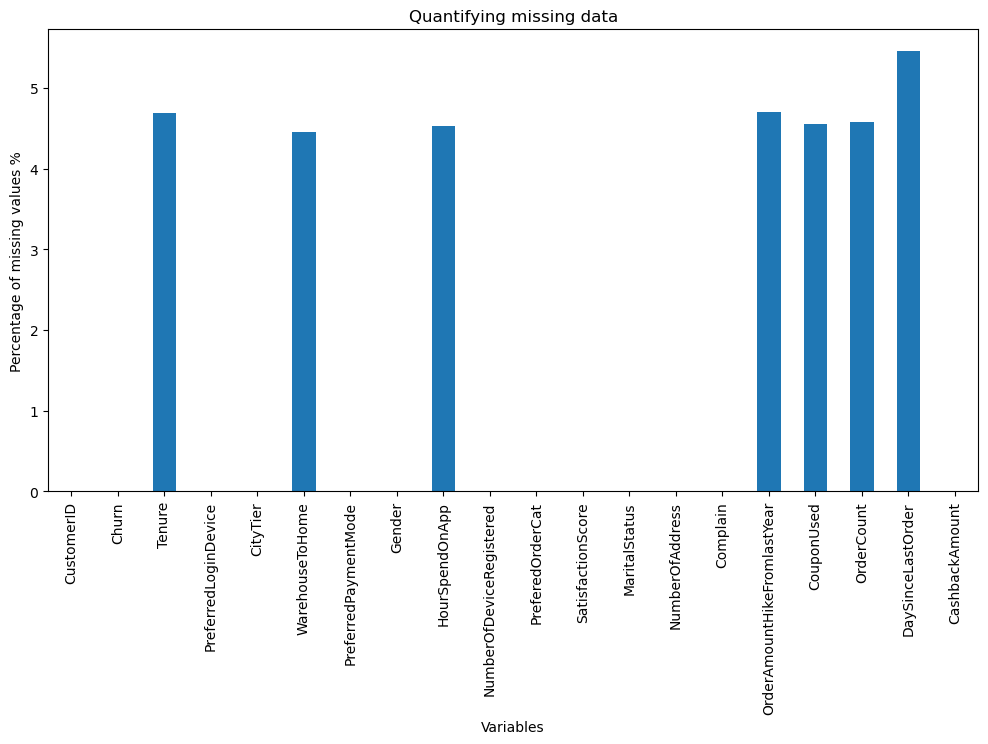

In [49]:
print("--------------------Null values ratio-----------------------")
display(df.isnull().mean()*100)
print("--------------------Plotting the ratio of null values-----------------")
(df.isnull().mean()*100).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values %')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

**The overall percentage of data that is missing is important. Generally, if less than 5% of values are missing then it is acceptable to ignore them (REF).**

In [56]:
df.dropna(axis=1 ,inplace=True)
print("-----------------After removing the null values-----------------")
display(df.isna().sum())
print("-----------------shape of data after removing nulls--------------")
df.shape

-----------------After removing the null values-----------------


CustomerID                  0
Churn                       0
PreferredLoginDevice        0
CityTier                    0
PreferredPaymentMode        0
Gender                      0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
CashbackAmount              0
dtype: int64

-----------------shape of data after removing nulls--------------


(5630, 13)